In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_excel("FEV-data-Excel.xlsx")

In [4]:
#task1_a
# Filter EVs with price ≤ 350,000 and range ≥ 400 km
filtered_df = df[
    (df["Minimal price (gross) [PLN]"] <= 350000) &
    (df["Range (WLTP) [km]"] >= 400)
]

# Show results
filtered_df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [5]:
#task1_b
# Group by Make and count how many models are available per manufacturer
grouped_by_make = filtered_df.groupby("Make")["Car full name"].count().reset_index()

# Rename column
grouped_by_make.columns = ["Make", "Number of Matching EVs"]
grouped_by_make

,Make,Number of Matching EVs
0,Audi,1
1,BMW,1
2,Hyundai,1
3,Kia,2
4,Mercedes-Benz,1
5,Tesla,3
6,Volkswagen,3


In [6]:
#task1_c
# Group by Make and calculate average battery capacity
avg_battery_by_make = filtered_df.groupby("Make")["Battery capacity [kWh]"].mean().reset_index()

# Rename column
avg_battery_by_make.columns = ["Make", "Average Battery Capacity (kWh)"]
avg_battery_by_make

,Make,Average Battery Capacity (kWh)
0,Audi,95.000000
1,BMW,80.000000
2,Hyundai,64.000000
3,Kia,64.000000
4,Mercedes-Benz,80.000000
5,Tesla,68.000000
6,Volkswagen,70.666667


In [7]:
#task2

col = "mean - Energy consumption [kWh/100 km]"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

if outliers.empty:
    print(" No outliers found in energy consumption.")
else:
    print("Outliers detected:")
    display(outliers[["Car full name", "Make", col]])


 No outliers found in energy consumption.


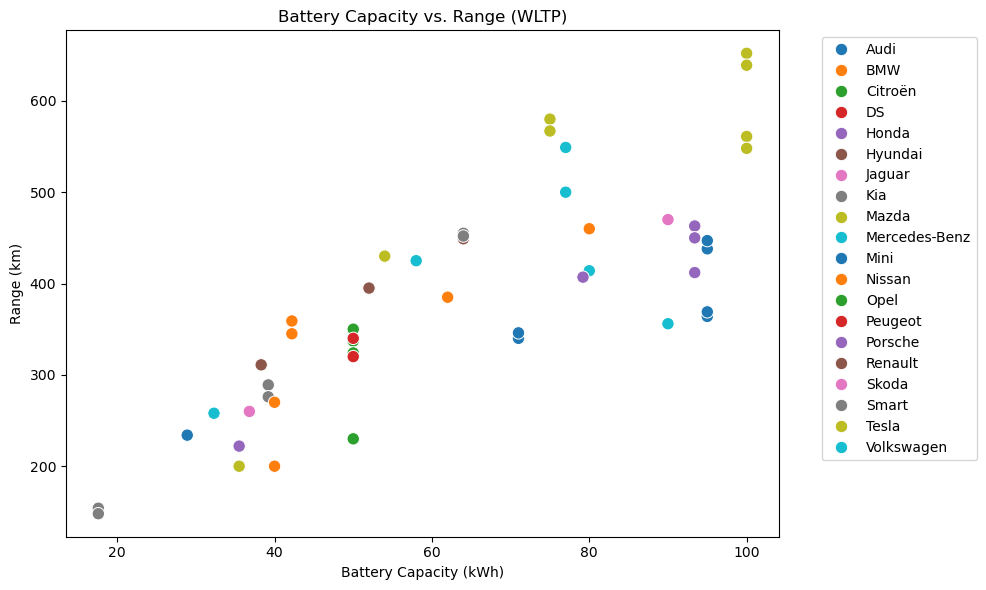

In [8]:
#task3_a
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Battery capacity [kWh]",
    y="Range (WLTP) [km]",
    hue="Make",        # Different colors by brand
    palette="tab10",
    s=80               # size of dots
)
plt.title("Battery Capacity vs. Range (WLTP)")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()

#task3_b
# The scatter plot shows the relationship between battery capacity and range.
# We observe a strong positive trend — cars with larger battery capacities generally have longer driving ranges.
#
# This is expected, as a bigger battery can store more energy. However, the relationship is not perfectly linear,
# suggesting that other factors like vehicle weight, aerodynamics, and efficiency also affect range.
#
# Manufacturers may optimize differently: some brands may achieve better range with smaller batteries due to design or software.

In [9]:
#task_4

class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        # Filter based on user's input
        matching_evs = self.data[
            (self.data["Minimal price (gross) [PLN]"] <= budget) &
            (self.data["Range (WLTP) [km]"] >= min_range) &
            (self.data["Battery capacity [kWh]"] >= min_battery)
        ]
        
        # Sort by range (descending) to prioritize best-performing EVs
        top_evs = matching_evs.sort_values(by="Range (WLTP) [km]", ascending=False).head(3)

        # Return only key info for display
        return top_evs[["Car full name", "Make", "Minimal price (gross) [PLN]", 
                        "Range (WLTP) [km]", "Battery capacity [kWh]"]]

In [10]:
#Task 4

print("Please enter your EV preferences:")
budget = int(input("Enter your budget (PLN, e.g., 350000): "))
min_range = int(input("Enter your minimum desired range (km, e.g., 400): "))
min_battery = float(input("Enter your minimum battery capacity (kWh, e.g., 60): "))
recommender = EVRecommender(df)
results = recommender.recommend(budget, min_range, min_battery)

if results.empty:
    print("No EVs match your criteria. Try adjusting your inputs.")
else:
    print("Top matching EVs:")
    display(results)


Please enter your EV preferences:


Enter your budget (PLN, e.g., 350000):  500000
Enter your minimum desired range (km, e.g., 400):  400
Enter your minimum battery capacity (kWh, e.g., 60):  60


Top matching EVs:


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
42,Tesla Model S Long Range Plus,Tesla,368990,652,100.0
43,Tesla Model S Performance,Tesla,443990,639,100.0
40,Tesla Model 3 Long Range,Tesla,235490,580,75.0


In [11]:
#task_5
from scipy.stats import ttest_ind

tesla_power = df[df["Make"] == "Tesla"]["Engine power [KM]"]
audi_power = df[df["Make"] == "Audi"]["Engine power [KM]"]

t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)  #t-test

print("Tesla mean engine power:", round(tesla_power.mean(), 2))
print("Audi mean engine power:", round(audi_power.mean(), 2))
print("\nT-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05  # significance level

if p_value < alpha:
    print("\nThere is a significant difference in average engine power between Tesla and Audi.")
else:
    print("\nThere is no significant difference in average engine power between Tesla and Audi.")


Tesla mean engine power: 533.0
Audi mean engine power: 392.0

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565

There is no significant difference in average engine power between Tesla and Audi.


In [13]:
# Project Video Link
print("Project video explanation:")
print("https://drive.google.com/file/d/1_Tq6RlbmUfoEGGrQR3Gk4rr8-vFM-7t-/view?usp=drive_link")

Project video explanation:
https://drive.google.com/file/d/1_Tq6RlbmUfoEGGrQR3Gk4rr8-vFM-7t-/view?usp=drive_link
